In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RHO=997 #kg/m^3
G = 9.8 #m/s^2 #pho* g* h [kg/m/s^2 = N/m^2]
P_ATM = 101325 #Pa

rng = np.random.default_rng()

In [3]:
def z_to_mbar(z:float, v=0.5):
  return (RHO*G*z+0.5*RHO*v**2)+P_ATM # N/m^2

In [10]:
p1 = z_to_mbar(0.5) + rng.uniform(-1*(z_to_mbar(0.05)-z_to_mbar(0)),z_to_mbar(0.05)-z_to_mbar(0))
amplitude = z_to_mbar(0.2,0)-z_to_mbar(0,0)
interval = 5
print(p1)
print(amplitude)

106703.20174904357
1954.1199999999953


In [24]:
def sine_func(t:float, interval:float=5, amplitude_p:float=25):
  #y = Asin(2pi * t/T)+p1+biasP  T:interval
  return p1+amplitude_p*np.sin(2*np.pi*t/interval) + rng.uniform(-1*(z_to_mbar(0.02)-z_to_mbar(0)),z_to_mbar(0.02)-z_to_mbar(0))

def create_imput_df(t:np.array, interval, amplitude_p) -> pd.DataFrame:
  time_array = t
  data = {"date": t, "a_x": 0, "a_y": 0, "a_z": 0, "angx": 0, "angy": 0, "angz": 0, "pressure": [sine_func(t, interval, amplitude_p) for t in time_array], "flag": 0}
  return pd.DataFrame(data)

In [25]:
t = np.arange(0,30,0.1)
input_df = create_imput_df(t, interval, amplitude)
input_df.loc[input_df['date'] > 5, 'flag'] = 1
input_df.to_csv(f"./input_demo_data.csv",index=False)

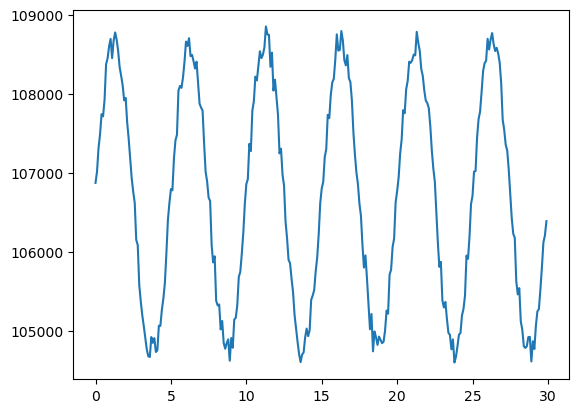

In [26]:
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(input_df["date"], input_df["pressure"])